# Project: Yelp Rating Regression Predictor

The restaurant industry is tougher than ever, from the aftermath of the pandemic and restaurant reviews blazing across the Internet from day one of a restaurant's opening. But as a lover of food, I was curious how difficult it might be to take on the task of opening a restaurant nowadays. Since a restaurant's success is highly correlated with its reputation, one would want to make sure it has the best reviews on the most queried restaurant review site: Yelp! While the food being produced should obviously be delicious, there are other factors that play into a Yelp rating and will ultimately determine your business's success. With a dataset of different restaurant features and their Yelp ratings, I decided to use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating and predict the Yelp rating for your restaurant!

In this project I have worked with a real dataset provided by Yelp. Six files have been used and listed below with a brief description:
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

For a more detailed explanation of the features in each `.json` file, see the accompanying [explanatory feature document](https://docs.google.com/document/d/1V6FjJpKspVBOOBs4E7fBfp_yzHn0--XJkC2uUtWuRgM/edit).


## Load the Data and Take a Peek

To get a better understanding of the dataset I've used Pandas to explore the data in DataFrame form. 


In [2]:
import pandas as pd
business = pd.read_json('yelp_business.json', lines=True)
businesses = pd.DataFrame(business)
review = pd.read_json('yelp_review.json', lines=True)
reviews = pd.DataFrame(review)
user = pd.read_json('yelp_user.json', lines=True)
users = pd.DataFrame(user)
checkin = pd.read_json('yelp_checkin.json', lines=True)
checkins = pd.DataFrame(checkin)
tip = pd.read_json('yelp_tip.json', lines=True)
tips = pd.DataFrame(tip)
photo = pd.read_json('yelp_photo.json', lines=True)
photos = pd.DataFrame(photo)

pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

#Inspected the first five rows of each DataFrame using the `.head()` method to get an overview of the data.

In [4]:
business.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [5]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [6]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [7]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [8]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [9]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [10]:
print(len(businesses))
print(reviews.columns)

188593
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')


In [11]:
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


In [12]:
businesses[businesses['business_id'] == '5EvUIR4IzCWUOm0PsUZXjA']['stars']


30781    3.0
Name: stars, dtype: float64

## Merge the Data

Since there are data from several files, we need to combine the data into a single DataFrame that allows us to analyze the different features with respect to our target variable, the Yelp rating. I have accomplished this by merging the multiple DataFrames we have together, joining them on the columns they have in common. In this case, the unique identifying column is the `business_id`.

In [13]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(business.columns)
print(reviews.columns)
print(df.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards'],
      dtype='object')
Index(['business_id', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes'],
      dtype='object')
Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes'

In [14]:
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')

print(df.columns)
print(tips.columns)

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')
Index(['business_id', 'average_tip_length', 'number_tips'], dtype='object')


## Clean the Data

In a Linear Regression model, our features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating. It seemed that a few features included some data that were binary, on the scale [0,1]. Any unnecessary features will be dropped from the list.

In [15]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(labels=features_to_remove, axis=1, inplace=True)

Now we just have to check our data to make sure we don't have any missing values, or `NaN`s, which will prevent the Linear Regression model from running correctly.

In [16]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

A few businesses in the list contained columns with a few missing values. But, I've easily fixed that by replacing them with `0`s.

In [17]:
df.fillna({'weekday_checkins':0, 
            'weekend_checkins':0,
            'average_tip_length':0, 
            'number_tips':0, 
            'average_caption_length':0, 
            'number_pics':0}, 
            inplace=True
            )
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## Exploratory Analysis

Now that the data is cleaned, I've investigated some of the different features to see what might correlate most with the dependent variable, the Yelp rating. The features with the best correlations would prove to be the most helpful for our Linear Regression model! So, I've used the correlation coefficients to determine a linear relationship.

In [18]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


To visualize these relationships, I've plotted the features with the highest correlation against our dependent variable, the Yelp rating. From the table above, the three highest correlations were `average_review_sentiment`, `average_review_length`, `average_review_age` against `stars`, or the Yelp rating.

>What is `average_review_sentiment`, you ask? `average_review_sentiment` is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool [VADER](https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from `-1`, most negative, to `+1`, most positive, with a score of `0` indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data!

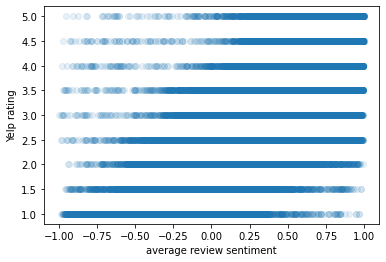

In [20]:
from matplotlib import pyplot as plt

# plot average_review_sentiment against stars here
plt.scatter(df['average_review_sentiment'], df['stars'], alpha=0.1)
plt.xlabel('average review sentiment')
plt.ylabel('Yelp rating')
plt.show()

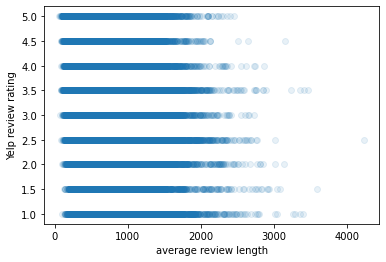

In [21]:
# plot average_review_length against stars here
plt.scatter(df['average_review_length'], df['stars'], alpha=0.1)
plt.xlabel('average review length')
plt.ylabel('Yelp review rating')
plt.show()

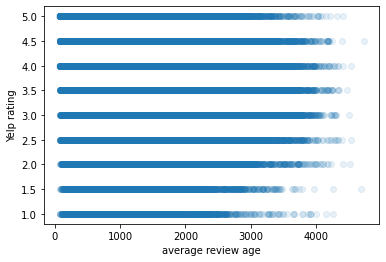

In [23]:
# plot average_review_age against stars here
plt.scatter(df['average_review_age'], df['stars'], alpha=0.1)
plt.xlabel('average review age')
plt.ylabel('Yelp rating')
plt.show()

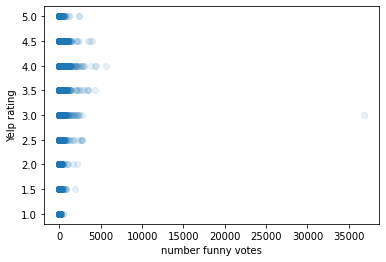

In [24]:
# plot number_funny_votes against stars here
plt.scatter(df['number_funny_votes'], df['stars'], alpha=0.1)
plt.xlabel('number funny votes')
plt.ylabel('Yelp rating')
plt.show()

## Data Selection

In order to put the data into a Linear Regression model, I've separated the features to model on and the Yelp ratings. I've used `average_review_length`, and `average_review_age` to model the Linear Regression against the Yelp ratings. 

In [29]:
features = df[['average_review_length', 'average_review_age']]
ratings = df['stars']

## Split the Data into Training and Testing Sets

Training set and test set sizes were chosen to be 0.8 and 0.2, respectively. 

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, train_size=0.8, random_state=1)


## Create and Train the Model


In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X_train, y_train)


## Evaluate and Understand the Model


In [41]:
print(model.score(X_train, y_train))

print(model.score(X_test, y_test))

0.08250309566544889
0.08083081210060561


I've calculated here the coefficients to the linear model:

In [42]:
sorted(list(zip(['average_review_length','average_review_age'],model.coef_)),key = lambda x: abs(x[1]),reverse=True)

[('average_review_length', -0.0009977176852074556),
 ('average_review_age', -0.00011621626836366491)]

Here are the calculations for the predicted Yelp ratings for our testing data compared to their actual Yelp ratings. For a perfect linear regression model we would expect to see the data plotted along the line `y = x`.

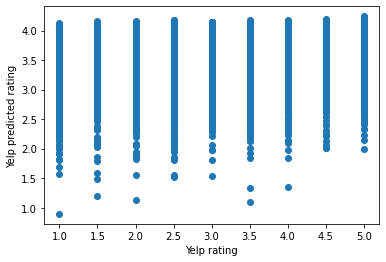

In [46]:
y_predicted = model.predict(X_test)
plt.scatter(y_test, y_predicted)
plt.xlabel('Yelp rating')
plt.ylabel('Yelp predicted rating')
plt.show()

## Define Different Subsets of Data

After evaluating the first model, it was clear that `average_review_length` and `average_review_age` alone were not the best predictors for Yelp rating. I've decided to add different subsets of features and see if I can achieve a more accurate model! 

In [47]:
sentiment = ['average_review_sentiment']
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']
all_features = binary_features + numeric_features
feature_subset = ['price_range']

## Further Modeling

In [51]:
import numpy as np


def model_these_features(feature_list):
    
     
    ratings = df.loc[:,'stars']
    features = df.loc[:,feature_list]
    
     
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
     
    model = LinearRegression()
    model.fit(X_train,y_train)
    
     
    print('Train Score:', model.score(X_train,y_train))
    print('Test Score:', model.score(X_test,y_test))
    
    
    print(sorted(list(zip(feature_list,model.coef_)),key = lambda x: abs(x[1]),reverse=True))
    
     
    y_predicted = model.predict(X_test)
    
     
    plt.scatter(y_test,y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Predicted Yelp Rating')
    plt.ylim(1,5)
    plt.show()

I've used these variables, defined a different subsets of the dataset, to remodel the original Linear Regression.

* `sentiment`: only `average_review_sentiment`
* `binary_features`: all features that have a response range [0,1]
* `numeric_features`: all features that vary on a greater range than [0,1]
* `all_features`: all features
* `feature_subset`: 'price range'

Train Score: 0.6118980950438655
Test Score: 0.6114021046919491
[('average_review_sentiment', 2.3033908433749746)]


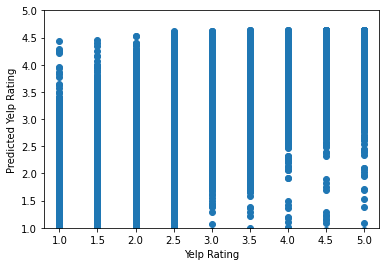

In [52]:
model_these_features(sentiment)


Train Score: 0.012223180709591608
Test Score: 0.010119542202269294
[('has_bike_parking', 0.19003008208036173), ('alcohol?', -0.1454967070813574), ('has_wifi', -0.13187397577762133), ('good_for_kids', -0.08632485990335652), ('takes_credit_cards', 0.07175536492192192), ('take_reservations', 0.045265585304516145)]


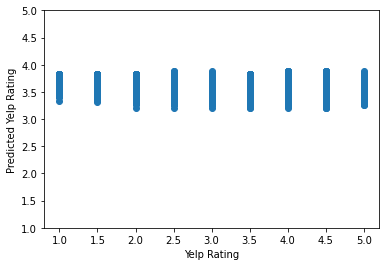

In [53]:
model_these_features(binary_features)

Train Score: 0.6734992593766658
Test Score: 0.6713318798120149
[('average_review_sentiment', 2.272107664209747), ('price_range', -0.08046080962699118), ('average_number_years_elite', -0.07190366288054131), ('average_caption_length', -0.0033470660077872735), ('number_pics', -0.0029565028128944178), ('number_tips', -0.0015953050789014765), ('number_cool_votes', 0.0011468839227090043), ('average_number_fans', 0.0010510602097445804), ('average_review_length', -0.0005813655692092802), ('average_tip_length', -0.0005322032063460549), ('number_useful_votes', -0.0002320378475874213), ('average_review_count', -0.00022431702895075103), ('average_review_age', -0.00016930608165077006), ('average_days_on_yelp', 0.00012878025876701844), ('weekday_checkins', 5.918580754450675e-05), ('weekend_checkins', -5.51817620696865e-05), ('average_number_friends', 4.8269921116038134e-05), ('review_count', -3.483483763852401e-05), ('number_funny_votes', -7.884395674022729e-06)]


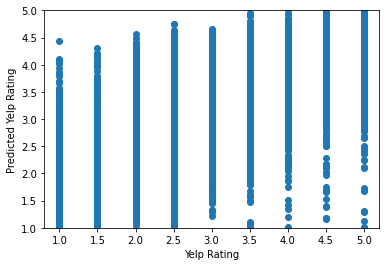

In [55]:
model_these_features(numeric_features)

Train Score: 0.6807828861895335
Test Score: 0.6782129045869248
[('average_review_sentiment', 2.2808456996623767), ('alcohol?', -0.1499149859346053), ('has_wifi', -0.12155382629260948), ('good_for_kids', -0.11807814422011238), ('price_range', -0.06486730150042835), ('average_number_years_elite', -0.06278939713895311), ('has_bike_parking', 0.027296969912237797), ('takes_credit_cards', 0.024451837853622673), ('take_reservations', 0.014134559172979544), ('number_pics', -0.0013133612300795844), ('average_number_fans', 0.00102679868226544), ('number_cool_votes', 0.00097237227344062), ('number_tips', -0.0008546563320878174), ('average_caption_length', -0.0006472749798181476), ('average_review_length', -0.0005896257920272718), ('average_tip_length', -0.00042052175034046194), ('number_useful_votes', -0.00027150641256125374), ('average_review_count', -0.0002339835690251073), ('average_review_age', -0.00015776544111325425), ('average_days_on_yelp', 0.00012326147662885742), ('review_count', 0.0001

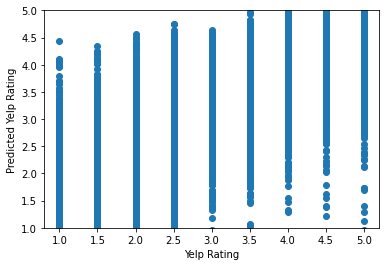

In [56]:
model_these_features(all_features)

Train Score: 0.00273518518581628
Test Score: 0.0026676219581159843
[('price_range', -0.05120519606891494)]


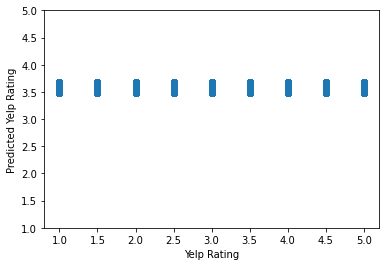

In [60]:
model_these_features(feature_subset)

## Conclusion

It is clear that the best R^2 correlation coefficient results from using all the features obtained at Yelp. However, the issue to this particular situation is that this could be the result of the model overshooting. In other words, we would have to take precaution that the model is not accounting for any false positives.

In [61]:
print(all_features)

['alcohol?', 'has_bike_parking', 'takes_credit_cards', 'good_for_kids', 'take_reservations', 'has_wifi', 'review_count', 'price_range', 'average_caption_length', 'number_pics', 'average_review_age', 'average_review_length', 'average_review_sentiment', 'number_funny_votes', 'number_cool_votes', 'number_useful_votes', 'average_tip_length', 'number_tips', 'average_number_friends', 'average_days_on_yelp', 'average_number_fans', 'average_review_count', 'average_number_years_elite', 'weekday_checkins', 'weekend_checkins']


Run the cell below to grab all the features and retrain our model on them.

In [62]:
features = df.loc[:,all_features]
ratings = df.loc[:,'stars']
X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

To conclude I have added the mean, min, and max values for all the features. I have also created a fake restaurant and gave its features the mean of all the restaurants in the dataset. I can now predict what the Yelp rating would be for an average restaurant listed in their database.

In [63]:
pd.DataFrame(list(zip(features.columns,features.describe().loc['mean'],features.describe().loc['min'],features.describe().loc['max'])),columns=['Feature','Mean','Min','Max'])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


In [64]:
jo2616_restaurant = np.array([0.140610,0.350692,0.700243,0.279029,0.106086,0.134968,31.797310,1.035855,2.831829,1.489939,1175.501021,596.463567,0.554935,15.617091,18.495973,43.515279,45.643426,6.285217,105.132000,2005.367009,11.590148,122.110660,0.923313,45.385094,49.612515]).reshape(1,-1)


In [65]:
model.predict(jo2616_restaurant)


C:\Users\josep\miniconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.62967774])

## Next Steps

I think it is crucial that this model should be further checked for false positives, given that it is reliant on all of the features labeled within the dataset.